## 임포트

In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from selenium.webdriver.common.by import By

import re
import time
import os

In [120]:
# 엑셀에 여러 시트로 저장하기 위한 모듈
!pip install Xlsxwriter

     -------------------------------------- 150.0/150.0 kB 9.3 MB/s eta 0:00:00


## 데이터수집

In [19]:
driver = webdriver.Chrome("C:/Users/wbs04/workspace/chromedriver_win32/chromedriver.exe")

C:\Users\wbs04\AppData\Local\Temp\ipykernel_6796\3636124997.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("C:/Users/wbs04/workspace/chromedriver_win32/chromedriver.exe")


In [17]:
def go_to_page(selector):
    global soup
    click_on = driver.find_element(By.CSS_SELECTOR, selector)
    click_on.click()
    time.sleep(1)
    soup = BeautifulSoup(driver.page_source, 'html.parser')

In [153]:
def make_dataframe():
    col_names = []
    record_col = soup.select("#cphContents_cphContents_cphContents_udpContent > div.record_result > table > thead > tr > th")
    for item in record_col:
        col_names.append(item.text)
        
    return pd.DataFrame(columns=col_names)

In [122]:
# 해당 url로 이동
url = "https://www.koreabaseball.com"
driver.get(url)

In [124]:
record = go_to_page('#lnb > li:nth-child(3) > a')

In [125]:
record_room = go_to_page('#lnb02')

In [133]:
# 기록표 컬럼명 저장 (기록표 컬럼명 바뀔 때마다 실행)
col_names = []
record_col = soup.select("#cphContents_cphContents_cphContents_udpContent > div.record_result > table > thead > tr > th")
for item in record_col:
    col_names.append(item.text)

In [134]:
# 기록 저장 데이터프레임 생성
df_record = pd.DataFrame(columns=col_names)

In [44]:
df_record

,순위,선수명,팀명,AVG,G,PA,AB,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,E


### 타자 기록

#### 1982 ~ 2001 타자 기록

In [113]:
years = soup.select('#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option')
hitter_dict = {}
for idx, year in enumerate(years[:-22]):
    season = year.text
    print(f"{season}시즌")  # 스크래핑 완료 확인용
    go_to_page(f'#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option:nth-child({idx+1})')


    # 전체 팀에 대해 자료 가져오기(년도별)
    team_dict = {}
    teams = soup.select('#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option')
    for idx, team in enumerate(teams[1:]):
        df_record = pd.DataFrame(columns=col_names)

        team_name = team.text.strip()
        print(idx+1, team_name)  # 스크래핑 완료 확인용
        go_to_page(f'#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option:nth-child({idx+2})')

        # 페이지 길이
        # 페이지 번호 길이
        page_btn = soup.select("div.paging > a")     
        page_range = 2 if len(page_btn) == 1 else len(page_btn)-1

        for j in range(1, page_range):
            # 페이지 이동
            go_to_page(f'#cphContents_cphContents_cphContents_ucPager_btnNo{j}')

            # 데이터프레임에 선수 정보 한 행씩 추가
            players_list = soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr')
            for player in players_list:
                player_record = player.text.strip().split('\n')
                df_record.loc[len(df_record)] = player_record

        team_dict[team_name] = df_record
    hitter_dict[season] = team_dict
    print('='*10)

1982시즌
1 롯데
2 삼미
3 삼성
4 해태
5 MBC
6 OB
1983시즌
1 롯데
2 삼미
3 삼성
4 해태
5 MBC
6 OB
1984시즌
1 롯데
2 삼미
3 삼성
4 해태
5 MBC
6 OB
1985시즌
1 롯데
2 삼성
3 청보
4 해태
5 MBC
6 OB
1986시즌
1 롯데
2 빙그레
3 삼성
4 청보
5 해태
6 MBC
7 OB
1987시즌
1 롯데
2 빙그레
3 삼성
4 청보
5 해태
6 MBC
7 OB
1988시즌
1 롯데
2 빙그레
3 삼성
4 태평양
5 해태
6 MBC
7 OB
1989시즌
1 롯데
2 빙그레
3 삼성
4 태평양
5 해태
6 MBC
7 OB
1990시즌
1 롯데
2 빙그레
3 삼성
4 태평양
5 해태
6 LG
7 OB
1991시즌
1 롯데
2 빙그레
3 삼성
4 쌍방울
5 태평양
6 해태
7 LG
8 OB
1992시즌
1 롯데
2 빙그레
3 삼성
4 쌍방울
5 태평양
6 해태
7 LG
8 OB
1993시즌
1 롯데
2 빙그레
3 삼성
4 쌍방울
5 태평양
6 해태
7 LG
8 OB
1994시즌
1 롯데
2 삼성
3 쌍방울
4 태평양
5 한화
6 해태
7 LG
8 OB
1995시즌
1 롯데
2 삼성
3 쌍방울
4 태평양
5 한화
6 해태
7 LG
8 OB
1996시즌
1 롯데
2 삼성
3 쌍방울
4 한화
5 해태
6 현대
7 LG
8 OB
1997시즌
1 롯데
2 삼성
3 쌍방울
4 한화
5 해태
6 현대
7 LG
8 OB
1998시즌
1 롯데
2 삼성
3 쌍방울
4 한화
5 해태
6 현대
7 LG
8 OB
1999시즌
1 두산
2 롯데
3 삼성
4 쌍방울
5 한화
6 해태
7 현대
8 LG
2000시즌
1 두산
2 롯데
3 삼성
4 한화
5 해태
6 현대
7 LG
8 SK
2001시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK


In [121]:
# 시트에 각각 저장
for k, v in hitter_dict.items():
    # 년도별 파일 생성
    writer = pd.ExcelWriter(f'hitter_record/{k}.xlsx', engine='xlsxwriter')
    for item in v.keys():
        # 시트에 팀별로 저장
        hitter_dict[k][item].to_excel(writer, sheet_name=item, index=False)
    # 파일 저장
    writer.save()

#### 2002 ~ 2022 타자 기록

##### 기본기록

In [128]:
years = soup.select('#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option')
hitter_dict = {}
for idx, year in enumerate(years[-22:-1]):
    season = year.text
    print(f"{season}시즌")  # 스크래핑 완료 확인용
    go_to_page(f'#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option:nth-child({idx+21})')


    # 전체 팀에 대해 자료 가져오기(년도별)
    team_dict = {}
    teams = soup.select('#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option')
    for idx, team in enumerate(teams[1:]):
        df_record = pd.DataFrame(columns=col_names)

        team_name = team.text
        print(idx+1, team_name)  # 스크래핑 완료 확인용
        go_to_page(f'#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option:nth-child({idx+2})')

        # 페이지 길이
        # 페이지 번호 길이
        page_btn = soup.select("div.paging > a")     
        page_range = 2 if len(page_btn) == 1 else len(page_btn)-1

        for j in range(1, page_range):
            # 페이지 이동
            go_to_page(f'#cphContents_cphContents_cphContents_ucPager_btnNo{j}')

            # 데이터프레임에 선수 정보 한 행씩 추가
            players_list = soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr')
            for player in players_list:
                player_record = player.text.strip().split('\n')
                df_record.loc[len(df_record)] = player_record

        team_dict[team_name] = df_record
    hitter_dict[season] = team_dict
    print('='*10)

2002시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2003시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2004시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2005시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2006시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2007시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2008시즌
1 두산
2 롯데
3 삼성
4 우리
5 한화
6 KIA
7 LG
8 SK
2009시즌
1 히어로즈
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2010시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2011시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2012시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2013시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 NC
9 SK
2014시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 NC
9 SK
2015시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2016시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2017시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2018시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2019시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2020시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2021시즌
1 두

In [130]:
# 시트에 각각 저장
for k, v in hitter_dict.items():
    # 년도별 파일 생성
    writer = pd.ExcelWriter(f'hitter_record/{k}.xlsx', engine='xlsxwriter')
    for item in v.keys():
        # 시트에 팀별로 저장
        hitter_dict[k][item].to_excel(writer, sheet_name=item, index=False)
    # 파일 저장
    writer.save()

##### 세부기록

In [136]:
# 세부기록으로 이동
go_to_page('#cphContents_cphContents_cphContents_udpContent > div.row > div.tab-depth3 > ul > li:nth-child(2) > a')

In [145]:
# 기록표 컬럼명 저장 (기록표 컬럼명 바뀔 때마다 실행)
col_names = []
record_col = soup.select("#cphContents_cphContents_cphContents_udpContent > div.record_result > table > thead > tr > th")
for item in record_col:
    col_names.append(item.text)

In [146]:
# 기록 저장 데이터프레임 생성
df_record = pd.DataFrame(columns=col_names)

In [148]:
years = soup.select('#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option')
hitter_dict = {}
for idx, year in enumerate(years[-21:]):
    season = year.text
    print(f"{season}시즌")  # 스크래핑 완료 확인용
    go_to_page(f'#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option:nth-child({idx+21})')


    # 전체 팀에 대해 자료 가져오기(년도별)
    team_dict = {}
    teams = soup.select('#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option')
    for idx, team in enumerate(teams[1:]):
        df_record = pd.DataFrame(columns=col_names)

        team_name = team.text
        print(idx+1, team_name)  # 스크래핑 완료 확인용
        go_to_page(f'#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option:nth-child({idx+2})')

        # 페이지 길이
        # 페이지 번호 길이
        page_btn = soup.select("div.paging > a")     
        page_range = 2 if len(page_btn) == 1 else len(page_btn)-1

        for j in range(1, page_range):
            # 페이지 이동
            go_to_page(f'#cphContents_cphContents_cphContents_ucPager_btnNo{j}')

            # 데이터프레임에 선수 정보 한 행씩 추가
            players_list = soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr')
            for player in players_list:
                player_record = player.text.strip().split('\n')
                df_record.loc[len(df_record)] = player_record

        team_dict[team_name] = df_record
    hitter_dict[season] = team_dict
    print('='*10)

2002시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2003시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2004시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2005시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2006시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2007시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2008시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2009시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2010시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2011시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2012시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2013시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2014시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2015시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2016시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2017시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2018시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 

In [150]:
# 시트에 각각 저장
for k, v in hitter_dict.items():
    # 년도별 파일 생성
    writer = pd.ExcelWriter(f'hitter_record/{k}_details.xlsx', engine='xlsxwriter')
    for item in v.keys():
        # 시트에 팀별로 저장
        hitter_dict[k][item].to_excel(writer, sheet_name=item, index=False)
    # 파일 저장
    writer.save()

### 투수 기록

In [152]:
# 투수로 이동
go_to_page('#contents > div.sub-content > div.tab-depth2 > ul > li:nth-child(2)')

#### 1982 ~ 2022 투수 기록

In [154]:
df_record = make_dataframe()

In [156]:
years = soup.select('#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option')
pitcher_dict = {}
for idx, year in enumerate(years[:-1]):
    season = year.text
    print(f"{season}시즌")  # 스크래핑 완료 확인용
    go_to_page(f'#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option:nth-child({idx+1})')


    # 전체 팀에 대해 자료 가져오기(년도별)
    team_dict = {}
    teams = soup.select('#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option')
    for idx, team in enumerate(teams[1:]):
        df_record = make_dataframe()

        team_name = team.text
        print(idx+1, team_name)  # 스크래핑 완료 확인용
        go_to_page(f'#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option:nth-child({idx+2})')

        # 페이지 길이
        # 페이지 번호 길이
        page_btn = soup.select("div.paging > a")     
        page_range = 2 if len(page_btn) == 1 else len(page_btn)-1

        for j in range(1, page_range):
            # 페이지 이동
            go_to_page(f'#cphContents_cphContents_cphContents_ucPager_btnNo{j}')

            # 데이터프레임에 선수 정보 한 행씩 추가
            players_list = soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr')
            for player in players_list:
                player_record = player.text.strip().split('\n')
                df_record.loc[len(df_record)] = player_record

        team_dict[team_name] = df_record
    pitcher_dict[season] = team_dict
    print('='*10)

1982시즌
1 롯데  
2 삼미  
3 삼성  
4 해태  
5 MBC   
6 OB    
1983시즌
1 롯데  
2 삼미  
3 삼성  
4 해태  
5 MBC   
6 OB    
1984시즌
1 롯데  
2 삼미  
3 삼성  
4 해태  
5 MBC   
6 OB    
1985시즌
1 롯데
2 삼성  
3 청보
4 해태
5 MBC
6 OB
1986시즌
1 롯데
2 빙그레
3 삼성
4 청보
5 해태
6 MBC
7 OB
1987시즌
1 롯데
2 빙그레
3 삼성
4 청보
5 해태
6 MBC
7 OB
1988시즌
1 롯데
2 빙그레
3 삼성
4 태평양
5 해태
6 MBC
7 OB
1989시즌
1 롯데
2 빙그레
3 삼성
4 태평양
5 해태
6 MBC
7 OB
1990시즌
1 롯데
2 빙그레
3 삼성
4 태평양
5 해태
6 LG
7 OB
1991시즌
1 롯데
2 빙그레
3 삼성
4 쌍방울
5 태평양
6 해태
7 LG
8 OB
1992시즌
1 롯데
2 빙그레
3 삼성
4 쌍방울
5 태평양
6 해태
7 LG
8 OB
1993시즌
1 롯데
2 빙그레
3 삼성
4 쌍방울
5 태평양
6 해태
7 LG
8 OB
1994시즌
1 롯데
2 삼성
3 쌍방울
4 태평양
5 한화
6 해태
7 LG
8 OB
1995시즌
1 롯데
2 삼성
3 쌍방울
4 태평양
5 한화
6 해태
7 LG
8 OB
1996시즌
1 롯데
2 삼성
3 쌍방울
4 한화
5 해태
6 현대
7 LG
8 OB
1997시즌
1 롯데
2 삼성
3 쌍방울
4 한화
5 해태
6 현대
7 LG
8 OB
1998시즌
1 롯데
2 삼성
3 쌍방울
4 한화
5 해태
6 현대
7 LG
8 OB
1999시즌
1 두산
2 롯데
3 삼성
4 쌍방울
5 한화
6 해태
7 현대
8 LG
2000시즌
1 두산
2 롯데
3 삼성
4 한화
5 해태
6 현대
7 LG
8 SK
2001시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2002시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8

In [160]:
# 시트에 각각 저장
for k, v in pitcher_dict.items():
    # 년도별 파일 생성
    writer = pd.ExcelWriter(f'pitcher_record/{k}.xlsx', engine='xlsxwriter')
    for item in v.keys():
        # 시트에 팀별로 저장
        pitcher_dict[k][item].to_excel(writer, sheet_name=item, index=False)
    # 파일 저장
    writer.save()

#### 2002 ~ 2022 투수 세부기록

In [161]:
# 세부기록으로 이동
go_to_page('#cphContents_cphContents_cphContents_udpContent > div.row > div.tab-depth3 > ul > li:nth-child(2) > a')

In [162]:
df_record = make_dataframe()

In [163]:
years = soup.select('#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option')
pitcher_dict = {}
for idx, year in enumerate(years[-21:]):
    season = year.text
    print(f"{season}시즌")  # 스크래핑 완료 확인용
    go_to_page(f'#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option:nth-child({idx+21})')


    # 전체 팀에 대해 자료 가져오기(년도별)
    team_dict = {}
    teams = soup.select('#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option')
    for idx, team in enumerate(teams[1:]):
        df_record = make_dataframe()

        team_name = team.text
        print(idx+1, team_name)  # 스크래핑 완료 확인용
        go_to_page(f'#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option:nth-child({idx+2})')

        # 페이지 길이
        # 페이지 번호 길이
        page_btn = soup.select("div.paging > a")     
        page_range = 2 if len(page_btn) == 1 else len(page_btn)-1

        for j in range(1, page_range):
            # 페이지 이동
            go_to_page(f'#cphContents_cphContents_cphContents_ucPager_btnNo{j}')

            # 데이터프레임에 선수 정보 한 행씩 추가
            players_list = soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr')
            for player in players_list:
                player_record = player.text.strip().split('\n')
                df_record.loc[len(df_record)] = player_record

        team_dict[team_name] = df_record
    pitcher_dict[season] = team_dict
    print('='*10)

2002시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2003시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2004시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2005시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2006시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2007시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2008시즌
1 두산
2 롯데
3 삼성
4 우리
5 한화
6 KIA
7 LG
8 SK
2009시즌
1 히어로즈
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2010시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2011시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2012시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2013시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 NC
9 SK
2014시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 NC
9 SK
2015시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2016시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2017시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2018시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2019시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2020시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2021시즌
1 두

In [164]:
# 시트에 각각 저장
for k, v in pitcher_dict.items():
    # 년도별 파일 생성
    writer = pd.ExcelWriter(f'pitcher_record/{k}_details.xlsx', engine='xlsxwriter')
    for item in v.keys():
        # 시트에 팀별로 저장
        pitcher_dict[k][item].to_excel(writer, sheet_name=item, index=False)
    # 파일 저장
    writer.save()

### 수비 기록

In [165]:
# 투수로 이동
go_to_page('#contents > div.sub-content > div.tab-depth2 > ul > li:nth-child(3)')

#### 2001 ~ 2022 수비 기록

In [168]:
df_record = make_dataframe()

In [169]:
years = soup.select('#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option')
defence_dict = {}
for idx, year in enumerate(years):
    season = year.text
    print(f"{season}시즌")  # 스크래핑 완료 확인용
    go_to_page(f'#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option:nth-child({idx+1})')


    # 전체 팀에 대해 자료 가져오기(년도별)
    team_dict = {}
    teams = soup.select('#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option')
    for idx, team in enumerate(teams[1:]):
        df_record = make_dataframe()

        team_name = team.text
        print(idx+1, team_name)  # 스크래핑 완료 확인용
        go_to_page(f'#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option:nth-child({idx+2})')

        # 페이지 길이
        # 페이지 번호 길이
        page_btn = soup.select("div.paging > a")     
        page_range = 2 if len(page_btn) == 1 else len(page_btn)-1

        for j in range(1, page_range):
            # 페이지 이동
            go_to_page(f'#cphContents_cphContents_cphContents_ucPager_btnNo{j}')

            # 데이터프레임에 선수 정보 한 행씩 추가
            players_list = soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr')
            for player in players_list:
                player_record = player.text.strip().split('\n')
                df_record.loc[len(df_record)] = player_record

        team_dict[team_name] = df_record
    defence_dict[season] = team_dict
    print('='*10)

2001시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2002시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2003시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2004시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2005시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2006시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2007시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2008시즌
1 두산
2 롯데
3 삼성
4 우리
5 한화
6 KIA
7 LG
8 SK
2009시즌
1 히어로즈
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2010시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2011시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2012시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2013시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 NC
9 SK
2014시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 NC
9 SK
2015시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2016시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2017시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2018시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2019시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2020시즌
1 두산
2 롯데
3 삼성

In [170]:
# 시트에 각각 저장
for k, v in defence_dict.items():
    # 년도별 파일 생성
    writer = pd.ExcelWriter(f'defence_record/{k}.xlsx', engine='xlsxwriter')
    for item in v.keys():
        # 시트에 팀별로 저장
        defence_dict[k][item].to_excel(writer, sheet_name=item, index=False)
    # 파일 저장
    writer.save()

### 주루 기록

In [171]:
# 투수로 이동
go_to_page('#contents > div.sub-content > div.tab-depth2 > ul > li:nth-child(4)')

#### 2001 ~ 2022 주루 기록

In [187]:
df_record = make_dataframe()

In [175]:
years = soup.select('#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option')
run_dict = {}
for idx, year in enumerate(years):
    season = year.text
    print(f"{season}시즌")  # 스크래핑 완료 확인용
    go_to_page(f'#cphContents_cphContents_cphContents_ddlSeason_ddlSeason > option:nth-child({idx+1})')


    # 전체 팀에 대해 자료 가져오기(년도별)
    team_dict = {}
    teams = soup.select('#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option')
    for idx, team in enumerate(teams[1:]):
        df_record = make_dataframe()

        team_name = team.text
        print(idx+1, team_name)  # 스크래핑 완료 확인용
        go_to_page(f'#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option:nth-child({idx+2})')

        # 페이지 길이
        # 페이지 번호 길이
        page_btn = soup.select("div.paging > a")     
        page_range = 2 if len(page_btn) == 1 else len(page_btn)-1

        for j in range(1, page_range):
            # 페이지 이동
            go_to_page(f'#cphContents_cphContents_cphContents_ucPager_btnNo{j}')

            # 데이터프레임에 선수 정보 한 행씩 추가
            players_list = soup.select('#cphContents_cphContents_cphContents_udpContent > div.record_result > table > tbody > tr')
            for player in players_list:
                player_record = player.text.strip().split('\n')
                df_record.loc[len(df_record)] = player_record

        team_dict[team_name] = df_record
    run_dict[season] = team_dict
    print('='*10)

2001시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2002시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2003시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2004시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2005시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2006시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2007시즌
1 두산
2 롯데
3 삼성
4 한화
5 현대
6 KIA
7 LG
8 SK
2008시즌
1 두산
2 롯데
3 삼성
4 우리
5 한화
6 KIA
7 LG
8 SK
2009시즌
1 히어로즈
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2010시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2011시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2012시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 SK
2013시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 NC
9 SK
2014시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 LG
8 NC
9 SK
2015시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2016시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2017시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2018시즌
1 넥센
2 두산
3 롯데
4 삼성
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2019시즌
1 두산
2 롯데
3 삼성
4 키움
5 한화
6 KIA
7 KT
8 LG
9 NC
10 SK
2020시즌
1 두산
2 롯데
3 삼성

In [176]:
# 시트에 각각 저장
for k, v in run_dict.items():
    # 년도별 파일 생성
    writer = pd.ExcelWriter(f'run_record/{k}.xlsx', engine='xlsxwriter')
    for item in v.keys():
        # 시트에 팀별로 저장
        run_dict[k][item].to_excel(writer, sheet_name=item, index=False)
    # 파일 저장
    writer.save()

## 데이터 전처리

In [2]:
# 부문별 구별되어 있는 데이터를 년도별 팀별로 구분

In [7]:
# 폴더 생성

In [5]:
os.mkdir('by_year')

In [76]:
for i in range(1982, 2023):
    os.mkdir(f'by_year/{i}')

In [73]:
record_files = ['hitter_record', 'pitcher_record', 'defence_record', 'run_record']

In [69]:
for file in record_files:
    s = ' '.join(os.listdir(f'{file}'))
    pat = re.compile('(\d{4})[.]xlsx')
    years = pat.findall(s)
    for year in years:
        df_record = pd.ExcelFile(f'{file}/{year}.xlsx')
        record_sheets = df_record.sheet_names
        
        for item in record_sheets:
            writer = pd.ExcelWriter(f'by_year/{year}/{item.strip()}.xlsx', engine='xlsxwriter')
            df_record.parse(item).to_excel(writer, sheet_name=file, index=False)
            writer.save()
            
writer.close()

ValueError: if_sheet_exists is only valid in append mode (mode='a')

In [77]:
for file in record_files:
    s = ' '.join(os.listdir(f'{file}'))
    pat = re.compile('(\d{4})[.]xlsx')
    years = pat.findall(s)
    for year in years:
        df_record = pd.ExcelFile(f'{file}/{year}.xlsx')
        record_sheets = df_record.sheet_names
        
        for item in record_sheets:
            if os.path.exists(f'by_year/{year}/{item.strip()}.xlsx'):
                writer = pd.ExcelWriter(f'by_year/{year}/{item.strip()}.xlsx', mode='a', engine='openpyxl')
            else:
                writer = pd.ExcelWriter(f'by_year/{year}/{item.strip()}.xlsx', engine='xlsxwriter')
                
            df_record.parse(item).to_excel(writer, sheet_name=file, index=False)
            writer.save()
            
writer.close()

In [58]:
s = ' '.join(os.listdir('defence_record'))
pat = re.compile('(\d{4})[.]xlsx')
pat.findall(s)

['2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022']

In [ ]:
# 세부기록 추가

In [78]:
for file in record_files[:2]:
    s = ' '.join(os.listdir(f'{file}'))
    pat = re.compile('(\d{4})_details[.]xlsx')
    years = pat.findall(s)
    for year in years:
        df_record = pd.ExcelFile(f'{file}/{year}.xlsx')
        record_sheets = df_record.sheet_names
        
        for item in record_sheets:
            writer = pd.ExcelWriter(f'by_year/{year}/{item.strip()}.xlsx', mode='a', engine='openpyxl')
            df_record.parse(item).to_excel(writer, sheet_name=f'{file}_details', index=False)
            writer.save()
            
writer.close()

## 데이터 분석

### 년도별 구단확인

In [245]:
# 팀 리스트 출력 함수
def team_list(season):
    team_name = []
    for item in os.listdir(f'by_year/{season}'):
        team_name.append(re.sub('(.+?)[.]xlsx', '\g<1>', item))
        
    return team_name

In [118]:
change_list = []  # 전년도와 비교해서 팀구성이 달라진 년도 저장
for i in range(1983, 2023):
    if team_list(i) != show_team_list(i-1):
        change_list.append(i)

In [120]:
print(change_list)

[1985, 1986, 1988, 1990, 1991, 1994, 1996, 1999, 2000, 2001, 2008, 2009, 2010, 2013, 2015, 2019, 2021]


In [126]:
print(f'1982 ~ : {team_list(1982)}')
for season in change_list:
    print(f'{season} ~ : {team_list(season)}')

1982 ~ : ['MBC', 'OB', '롯데', '삼미', '삼성', '해태']
1985 ~ : ['MBC', 'OB', '롯데', '삼성', '청보', '해태']
1986 ~ : ['MBC', 'OB', '롯데', '빙그레', '삼성', '청보', '해태']
1988 ~ : ['MBC', 'OB', '롯데', '빙그레', '삼성', '태평양', '해태']
1990 ~ : ['LG', 'OB', '롯데', '빙그레', '삼성', '태평양', '해태']
1991 ~ : ['LG', 'OB', '롯데', '빙그레', '삼성', '쌍방울', '태평양', '해태']
1994 ~ : ['LG', 'OB', '롯데', '삼성', '쌍방울', '태평양', '한화', '해태']
1996 ~ : ['LG', 'OB', '롯데', '삼성', '쌍방울', '한화', '해태', '현대']
1999 ~ : ['LG', '두산', '롯데', '삼성', '쌍방울', '한화', '해태', '현대']
2000 ~ : ['LG', 'SK', '두산', '롯데', '삼성', '한화', '해태', '현대']
2001 ~ : ['KIA', 'LG', 'SK', '두산', '롯데', '삼성', '한화', '현대']
2008 ~ : ['KIA', 'LG', 'SK', '두산', '롯데', '삼성', '우리', '한화']
2009 ~ : ['KIA', 'LG', 'SK', '두산', '롯데', '삼성', '한화', '히어로즈']
2010 ~ : ['KIA', 'LG', 'SK', '넥센', '두산', '롯데', '삼성', '한화']
2013 ~ : ['KIA', 'LG', 'NC', 'SK', '넥센', '두산', '롯데', '삼성', '한화']
2015 ~ : ['KIA', 'KT', 'LG', 'NC', 'SK', '넥센', '두산', '롯데', '삼성', '한화']
2019 ~ : ['KIA', 'KT', 'LG', 'NC', 'SK', '두산', '롯데', '삼성', '키움', '한화']
2

### 년도별 순위확인 - 포스트시즌

In [ ]:
# 구단 변천사 확인
# https://www.koreabaseball.com/History/Etc/TeamHistory.aspx
# https://namu.wiki/w/KBO%20%ED%8F%AC%EC%8A%A4%ED%8A%B8%EC%8B%9C%EC%A6%8C 포스트시즌
# https://ko.wikipedia.org/wiki/KBO_%EB%A6%AC%EA%B7%B8_%EC%97%B0%EB%8F%84%EB%B3%84_%ED%8C%80_%EC%88%9C%EC%9C%84

In [3]:
import urllib.request
from urllib.request import Request, urlopen  # HTTPError: HTTP Error 403: Forbidden 에러발생

In [4]:
# 포스트시즌 기록
url = 'https://namu.wiki/w/KBO%20%ED%8F%AC%EC%8A%A4%ED%8A%B8%EC%8B%9C%EC%A6%8C'
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
data = urlopen(req).read()
soup = BeautifulSoup(data, 'html.parser')

In [5]:
table = soup.select('#jWZtJ8Cjb > div.aa7ee88d > div > div > div > div > div > div > div > div > div > div.aCNBxUDm > div:nth-child(7) > div > div > div > div > div > div > div > div > div:nth-child(6) > div > div:nth-child(13) > div > div > div > div > div > div > div > div:nth-child(1) > div > div:nth-child(21) > div.rYXEqDWZ > table > tbody')[0]

In [6]:
cols = []
for i in range(6):
    cols.append(table.select('.upwzFoAB')[i].text)
post_season = pd.DataFrame(columns=cols)

In [7]:
post_season

,연도,우승팀,준우승팀,PO 패배팀,준PO 패배팀,WC 패배팀


In [8]:
for i in range(1, 41):
    elements = []
    for j in range(i*6, (i+1)*6):
        elements.append(table.select('.upwzFoAB')[j].text)
    post_season.loc[i-1] = elements

In [9]:
post_season = post_season.set_index('연도')

In [11]:
post_season.to_excel('post_season.xlsx')

### 년도별 순위확인 - 정규시즌

In [20]:
url = 'https://www.koreabaseball.com/TeamRank/TeamRank.aspx'
data = urllib.request.urlopen(url)
soup = BeautifulSoup(data, 'html.parser')

In [21]:
url = "https://www.koreabaseball.com/TeamRank/TeamRank.aspx"
driver.get(url)

In [22]:
cols = ['연도', '1위', '2위', '3위', '4위', '5위', '6위', '7위', '8위', '9위', '10위']
regular_season = pd.DataFrame(columns=cols)

In [23]:
for i in reversed(range(1, 42)):
    go_to_page(f'#cphContents_cphContents_cphContents_ddlYear > option:nth-child({i})')
    
    rank_list = soup.select('#cphContents_cphContents_cphContents_udpRecord > table > tbody > tr')
    ranking = [soup.select(f'#cphContents_cphContents_cphContents_ddlYear > option:nth-child({i})')[0].text]
    for rank in rank_list:
        ranking.append(rank.select('td')[1].text)
    while len(ranking) != 11:
        ranking.append('-')
    regular_season.loc[i-1] = ranking

In [24]:
regular_season = regular_season.set_index('연도')

In [ ]:
23, 24

In [25]:
regular_season.loc['2000'] = ['현대', '두산', '삼성', 'LG', '롯데', '해태', '한화', 'SK', '-', '-']
regular_season.loc['1999'] = ['두산', '롯데', '삼성', '한화', '현대', 'LG', '해태', '쌍방울', '-', '-']

In [27]:
regular_season.to_excel('regular_season.xlsx')

In [28]:
regular_season

,1위,2위,3위,4위,5위,6위,7위,8위,9위,10위
연도,,,,,,,,,,
1982,OB,삼성,MBC,해태,롯데,삼미,-,-,-,-
1983,해태,MBC,삼미,삼성,OB,롯데,-,-,-,-
1984,롯데,삼성,OB,MBC,해태,삼미,-,-,-,-
1985,삼성,롯데,해태,OB,MBC,청보,-,-,-,-
1986,해태,삼성,MBC,OB,롯데,청보,빙그레,-,-,-
1987,해태,삼성,롯데,OB,MBC,빙그레,청보,-,-,-
1988,해태,빙그레,롯데,삼성,OB,MBC,태평양,-,-,-
1989,해태,빙그레,태평양,삼성,OB,MBC,롯데,-,-,-
1990,LG,삼성,해태,빙그레,태평양,롯데,OB,-,-,-


### 포스트시즌 전 순위

In [362]:
post_season

,우승팀,준우승팀,PO 패배팀,준PO 패배팀,WC 패배팀
연도,,,,,
1982,OB 베어스(전기 우승),삼성 라이온즈(후기 우승),,,
1983,해태 타이거즈(전기 우승),MBC 청룡(후기 우승),,,
1984,롯데 자이언츠(후기 우승),삼성 라이온즈(전기 우승),,,
1985,삼성 라이온즈[21](전후기 통합 우승),롯데 자이언츠[22](전후기 통합 준우승),,,
1986,해태 타이거즈(전후기 통합 2위),삼성 라이온즈(전기 1위),OB 베어스(후기 1위),,
1987,해태 타이거즈(후기 2위),삼성 라이온즈(전후기 통합 1위),OB 베어스(전기 2위),,
1988,해태 타이거즈(전후기 통합 1위),빙그레 이글스(전기 2위),삼성 라이온즈(후기 2위),,
1989,해태 타이거즈(2위),빙그레 이글스(1위),태평양 돌핀스(3위),삼성 라이온즈(4위),
1990,LG 트윈스(1위),삼성 라이온즈(4위),해태 타이거즈(2위),빙그레 이글스(3위),


In [29]:
before_post_season = regular_season

In [318]:
before_post_season

,1위,2위,3위,4위,5위,6위,7위,8위,9위,10위
연도,,,,,,,,,,
1982,OB,삼성,MBC,해태,롯데,삼미,-,-,-,-
1983,해태,MBC,삼미,삼성,OB,롯데,-,-,-,-
1984,롯데,삼성,OB,MBC,해태,삼미,-,-,-,-
1985,삼성,롯데,해태,OB,MBC,청보,-,-,-,-
1986,해태,삼성,MBC,OB,롯데,청보,빙그레,-,-,-
1987,해태,삼성,롯데,OB,MBC,빙그레,청보,-,-,-
1988,해태,빙그레,롯데,삼성,OB,MBC,태평양,-,-,-
1989,해태,빙그레,태평양,삼성,OB,MBC,롯데,-,-,-
1990,LG,삼성,해태,빙그레,태평양,롯데,OB,-,-,-


In [30]:
indexs = post_season.index
pat = re.compile('\((\d위)\)')

In [31]:
for i in indexs[19:]:
    for v in post_season.loc[i].values:
        if len(v):
            before_post_season[pat.findall(v)[0]][i] = v.split()[0].upper()

In [32]:
before_post_season

,1위,2위,3위,4위,5위,6위,7위,8위,9위,10위
연도,,,,,,,,,,
1982,OB,삼성,MBC,해태,롯데,삼미,-,-,-,-
1983,해태,MBC,삼미,삼성,OB,롯데,-,-,-,-
1984,롯데,삼성,OB,MBC,해태,삼미,-,-,-,-
1985,삼성,롯데,해태,OB,MBC,청보,-,-,-,-
1986,해태,삼성,MBC,OB,롯데,청보,빙그레,-,-,-
1987,해태,삼성,롯데,OB,MBC,빙그레,청보,-,-,-
1988,해태,빙그레,롯데,삼성,OB,MBC,태평양,-,-,-
1989,해태,빙그레,태평양,삼성,OB,MBC,롯데,-,-,-
1990,LG,삼성,해태,빙그레,태평양,롯데,OB,-,-,-


In [33]:
before_post_season['6위']['2009'] = '넥센'

In [34]:
before_post_season.to_excel('before_post_season.xlsx')

In [35]:
before_post_season

,1위,2위,3위,4위,5위,6위,7위,8위,9위,10위
연도,,,,,,,,,,
1982,OB,삼성,MBC,해태,롯데,삼미,-,-,-,-
1983,해태,MBC,삼미,삼성,OB,롯데,-,-,-,-
1984,롯데,삼성,OB,MBC,해태,삼미,-,-,-,-
1985,삼성,롯데,해태,OB,MBC,청보,-,-,-,-
1986,해태,삼성,MBC,OB,롯데,청보,빙그레,-,-,-
1987,해태,삼성,롯데,OB,MBC,빙그레,청보,-,-,-
1988,해태,빙그레,롯데,삼성,OB,MBC,태평양,-,-,-
1989,해태,빙그레,태평양,삼성,OB,MBC,롯데,-,-,-
1990,LG,삼성,해태,빙그레,태평양,롯데,OB,-,-,-


### 팀별순위

In [315]:
url = "https://www.koreabaseball.com/History/Etc/TeamHistory.aspx"
driver.get(url)

In [316]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [317]:
rows = soup.select('#change > table > tbody > tr')

In [344]:
team_ranking_list = []

In [345]:
for i in range(12):
    tmp = []
    for row in rows:
        tmp.append(row.select('td')[i].text.strip())
    team_ranking_list.append(tmp)

In [274]:
team_ranking_list

[['2\n\n\n\n삼성라이온즈\n창단일1982년 2월 03일',
  '4',
  '2',
  '1',
  '2',
  '2',
  '4',
  '4',
  '2',
  '3',
  '4',
  '2',
  '5',
  '5',
  '6',
  '4',
  '3',
  '4',
  '3',
  '2',
  '1',
  '4',
  '2',
  '1',
  '1',
  '4',
  '4',
  '5',
  '2',
  '1',
  '1',
  '1',
  '1',
  '2',
  '9',
  '9',
  '6',
  '8',
  '8',
  '3'],
 ['4해태타이거즈\n\n\n\n해태타이거즈\n창단일1982년 1월 30일',
  '1',
  '5',
  '3',
  '1',
  '1',
  '1',
  '1',
  '3',
  '1',
  '3',
  '1',
  '4',
  '4',
  '1',
  '1',
  '5',
  '7',
  '6',
  '5\n\n\n\nKIA타이거즈\n창단일2001년 8월 01일',
  '3',
  '3',
  '4',
  '8',
  '4',
  '8',
  '6',
  '1',
  '5',
  '4',
  '5',
  '8',
  '8',
  '7',
  '5',
  '1',
  '5',
  '7',
  '6',
  '9'],
 ['5\n\n\n\n롯데자이언츠\n창단일1982년 2월 22일',
  '6',
  '1',
  '2',
  '5',
  '3',
  '3',
  '7',
  '6',
  '4',
  '1',
  '6',
  '6',
  '2',
  '5',
  '8',
  '8',
  '2',
  '5',
  '8',
  '8',
  '8',
  '8',
  '5',
  '7',
  '7',
  '3',
  '4',
  '4',
  '3',
  '4',
  '5',
  '7',
  '8',
  '8',
  '3',
  '7',
  '10',
  '7',
  '8'],
 ['6삼미슈퍼스타즈\n\n\n\n삼미슈퍼스타

In [346]:
pat = re.compile('(.+?)\\n창단일')
name_change = []
for i in range(len(team_ranking_list)):
    tmp = []
    for item in team_ranking_list[i]:
        if pat.findall(item):
            tmp.append(pat.findall(item)[0])
    name_change.append(tmp)

In [306]:
name_change

[['삼성라이온즈'],
 ['해태타이거즈', 'KIA타이거즈'],
 ['롯데자이언츠'],
 ['삼미슈퍼스타즈', '청보핀토스', '태평양돌핀스', '현대유니콘스'],
 ['MBC청룡', 'LG트윈스'],
 ['OB베어스', '두산베어스'],
 ['빙그레이글스', '한화이글스'],
 ['쌍방울레이더스'],
 ['SK 와이번스', 'SSG 랜더스'],
 ['키움 히어로즈'],
 ['NC 다이노스'],
 ['kt wiz']]

In [347]:
pat = re.compile('(\d+)\D')
for i in range(12):
    for j in range(40):
        rank = pat.findall(team_ranking_list[i][j])
        if rank:
            team_ranking_list[i][j] = pat.findall(team_ranking_list[i][j])[0]
            if len(team_ranking_list[i][j]) > 2:
                team_ranking_list[i][j] = ''

In [348]:
team_ranking_list

[['2',
  '4',
  '2',
  '1',
  '2',
  '2',
  '4',
  '4',
  '2',
  '3',
  '4',
  '2',
  '5',
  '5',
  '6',
  '4',
  '3',
  '4',
  '3',
  '2',
  '1',
  '4',
  '2',
  '1',
  '1',
  '4',
  '4',
  '5',
  '2',
  '1',
  '1',
  '1',
  '1',
  '2',
  '9',
  '9',
  '6',
  '8',
  '8',
  '3'],
 ['4',
  '1',
  '5',
  '3',
  '1',
  '1',
  '1',
  '1',
  '3',
  '1',
  '3',
  '1',
  '4',
  '4',
  '1',
  '1',
  '5',
  '7',
  '6',
  '5',
  '3',
  '3',
  '4',
  '8',
  '4',
  '8',
  '6',
  '1',
  '5',
  '4',
  '5',
  '8',
  '8',
  '7',
  '5',
  '1',
  '5',
  '7',
  '6',
  '9'],
 ['5',
  '6',
  '1',
  '2',
  '5',
  '3',
  '3',
  '7',
  '6',
  '4',
  '1',
  '6',
  '6',
  '2',
  '5',
  '8',
  '8',
  '2',
  '5',
  '8',
  '8',
  '8',
  '8',
  '5',
  '7',
  '7',
  '3',
  '4',
  '4',
  '3',
  '4',
  '5',
  '7',
  '8',
  '8',
  '3',
  '7',
  '10',
  '7',
  '8'],
 ['6',
  '3',
  '6',
  '6',
  '6',
  '7',
  '7',
  '3',
  '5',
  '5',
  '6',
  '8',
  '2',
  '7',
  '2',
  '6',
  '1',
  '5',
  '1',
  '3',
  '4',
  '1',
  

In [362]:
years = [x.select('th')[0].text for x in rows]

In [394]:
df = pd.DataFrame(team_ranking_list).T
df.columns = [x[-1] for x in name_change]
df.index = [x for x in range(1982, 2022)]
df.index.name = '연도'

In [384]:
df

,삼성라이온즈,KIA타이거즈,롯데자이언츠,현대유니콘스,LG트윈스,두산베어스,한화이글스,쌍방울레이더스,SSG 랜더스,키움 히어로즈,NC 다이노스,kt wiz
연도,,,,,,,,,,,,
1982,2,4,5,6,3,1,,,,,,
1983,4,1,6,3,2,5,,,,,,
1984,2,5,1,6,4,3,,,,,,
1985,1,3,2,6,5,4,,,,,,
1986,2,1,5,6,3,4,7,,,,,
1987,2,1,3,7,5,4,6,,,,,
1988,4,1,3,7,6,5,2,,,,,
1989,4,1,7,3,6,5,2,,,,,
1990,2,3,6,5,1,7,4,,,,,


In [395]:
df.columns = ['삼성', 'KIA', '롯데', '현대', 'LG', '두산', '한화', '쌍방울', 'SSG', '키움', 'NC', 'KT']
df

,삼성,KIA,롯데,현대,LG,두산,한화,쌍방울,SSG,키움,NC,KT
연도,,,,,,,,,,,,
1982,2,4,5,6,3,1,,,,,,
1983,4,1,6,3,2,5,,,,,,
1984,2,5,1,6,4,3,,,,,,
1985,1,3,2,6,5,4,,,,,,
1986,2,1,5,6,3,4,7,,,,,
1987,2,1,3,7,5,4,6,,,,,
1988,4,1,3,7,6,5,2,,,,,
1989,4,1,7,3,6,5,2,,,,,
1990,2,3,6,5,1,7,4,,,,,


In [400]:
df.dtypes

삼성     object
KIA    object
롯데     object
현대     object
LG     object
두산     object
한화     object
쌍방울    object
SSG    object
키움     object
NC     object
KT     object
dtype: object

In [401]:
df.apply(pd.to_numeric)
df

,삼성,KIA,롯데,현대,LG,두산,한화,쌍방울,SSG,키움,NC,KT
연도,,,,,,,,,,,,
1982,2,4,5,6,3,1,,,,,,
1983,4,1,6,3,2,5,,,,,,
1984,2,5,1,6,4,3,,,,,,
1985,1,3,2,6,5,4,,,,,,
1986,2,1,5,6,3,4,7,,,,,
1987,2,1,3,7,5,4,6,,,,,
1988,4,1,3,7,6,5,2,,,,,
1989,4,1,7,3,6,5,2,,,,,
1990,2,3,6,5,1,7,4,,,,,


In [402]:
df.to_excel('team_ranking.xlsx')

## 시각화

In [21]:
import matplotlib.pyplot as plt

In [24]:
import matplotlib
from matplotlib import font_manager,rc  # 한글 폰트 입력을 위한 라이브러리

In [25]:
#폰트 경로 가져오기
font_path = 'C:/Windows/Fonts/gulim.ttc'
 
#폰트 이름 얻어오기
font_name = font_manager.FontProperties(fname=font_path).get_name()
 
#폰트 설정하기
matplotlib.rc('font',family=font_name)

### 순위/평균타율

In [584]:
df = pd.read_excel('team_ranking.xlsx')

In [408]:
df

,연도,삼성,KIA,롯데,현대,LG,두산,한화,쌍방울,SSG,키움,NC,KT
0,1982,2,4,5,6.0,3,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1983,4,1,6,3.0,2,5,NaN,NaN,NaN,NaN,NaN,NaN
2,1984,2,5,1,6.0,4,3,NaN,NaN,NaN,NaN,NaN,NaN
3,1985,1,3,2,6.0,5,4,NaN,NaN,NaN,NaN,NaN,NaN
4,1986,2,1,5,6.0,3,4,7.0,NaN,NaN,NaN,NaN,NaN
5,1987,2,1,3,7.0,5,4,6.0,NaN,NaN,NaN,NaN,NaN
6,1988,4,1,3,7.0,6,5,2.0,NaN,NaN,NaN,NaN,NaN
7,1989,4,1,7,3.0,6,5,2.0,NaN,NaN,NaN,NaN,NaN
8,1990,2,3,6,5.0,1,7,4.0,NaN,NaN,NaN,NaN,NaN
9,1991,3,1,4,5.0,6,8,2.0,6.0,NaN,NaN,NaN,NaN


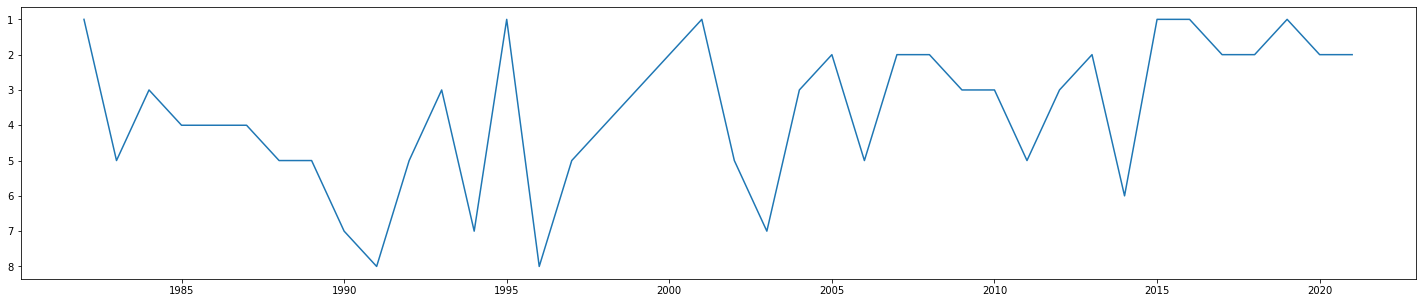

In [407]:
plt.figure(figsize=(25,5))            
plt.plot(df['연도'], df['두산'])
plt.gca().invert_yaxis()
plt.show()

In [485]:
df_list = []
for i in range(1982, 2022):
    if '두산.xlsx' in os.listdir(f'by_year/{i}'):
        df_list.append(pd.read_excel(f'by_year/{i}/두산.xlsx', sheet_name='hitter_record'))
    else:
        df_list.append(pd.read_excel( f'by_year/{i}/OB.xlsx', sheet_name='hitter_record'))

In [486]:
avg_mean = []
for i in range(len(df_list)):
    main = df_list[i].nlargest(10, 'G')
    main['AVG'] = pd.to_numeric(main['AVG'], downcast="float")
    avg_mean.append(main['AVG'].mean())

In [491]:
avg_df = pd.DataFrame(columns=['연도', '평타'])
years = [x for x in range(1982, 2022)]
for i in range(len(df_list)):
    avg_df.loc[i] = [years[i], avg_mean[i]]

In [492]:
avg_df

,연도,평타
0,1982.0,0.2864
1,1983.0,0.2643
2,1984.0,0.2482
3,1985.0,0.2730
4,1986.0,0.2556
5,1987.0,0.2672
6,1988.0,0.2618
7,1989.0,0.2593
8,1990.0,0.2193
9,1991.0,0.2483


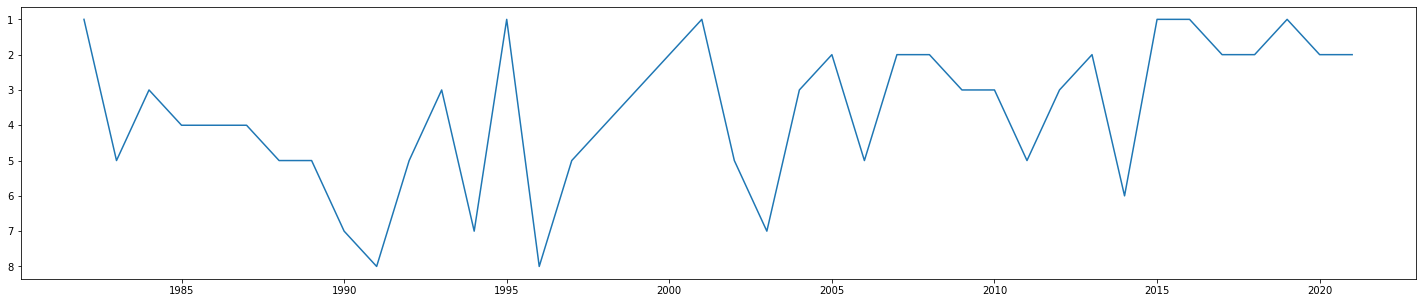

In [495]:
plt.figure(figsize=(25,5))            
plt.plot(df['연도'], df['두산'])
plt.gca().invert_yaxis()
plt.show()

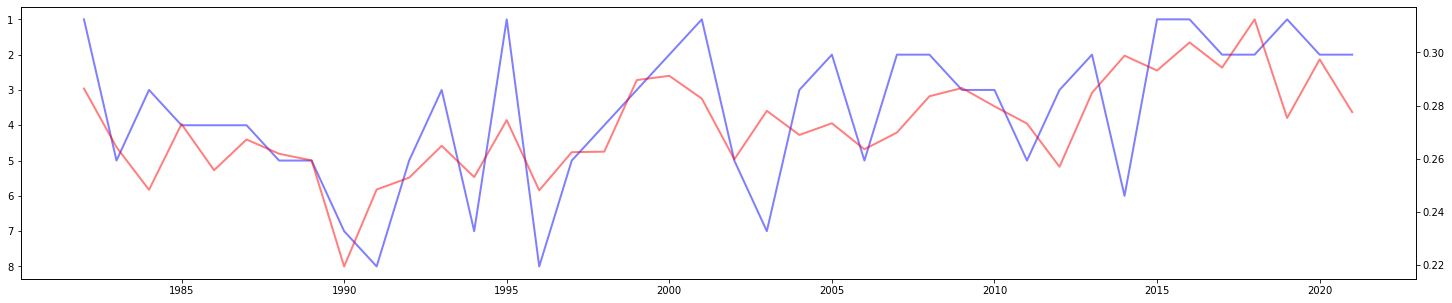

In [503]:
plt.figure(figsize=(25,5))            
plt.plot(df['연도'], df['두산'], color='blue', alpha=0.5, linewidth=2)
plt.gca().invert_yaxis()

fig = plt.twinx()
fig.plot(avg_df['연도'], avg_df['평타'], color='red', alpha=0.5, linewidth=2)
plt.show()

### 순위/평균자책점평균

In [579]:
df_list = []
for i in range(1982, 2022):
    if '두산.xlsx' in os.listdir(f'by_year/{i}'):
        df_list.append(pd.read_excel(f'by_year/{i}/두산.xlsx', sheet_name='pitcher_record'))
    else:
        df_list.append(pd.read_excel( f'by_year/{i}/OB.xlsx', sheet_name='pitcher_record'))

In [580]:
pat = re.compile('(\d+) (\d)/(\d)')

for d in df_list:
    for i in range(len(d)):
        m = pat.match(df['IP'][i])
        if m:
            d['IP'][i] = float(m.group(1)) + (float(m.group(2))/float(m.group(3)))
        elif '/' in df['IP'][i]:
            d['IP'][i] = int(d['IP'][i].split('/')[0]) / int(d['IP'][i].split('/')[1])
        else:
            d['IP'][i] = float(d['IP'][i])
    d['IP'] = pd.to_numeric(d['IP'], downcast="float")

C:\Users\wbs04\AppData\Local\Temp\ipykernel_6796\3545978949.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IP'][i] = float(m.group(1)) + (float(m.group(2))/float(m.group(3)))
C:\Users\wbs04\AppData\Local\Temp\ipykernel_6796\3545978949.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IP'][i] = float(df['IP'][i])
C:\Users\wbs04\AppData\Local\Temp\ipykernel_6796\3545978949.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [581]:
avg_mean = []
for i in range(len(df_list)):
#     main['IP']
    main = df_list[i].nlargest(10, 'IP')
    main['ERA'] = pd.to_numeric(main['ERA'], downcast="float")
    avg_mean.append(main['ERA'].mean())

In [582]:
avg_df = pd.DataFrame(columns=['연도', '평자평'])
years = [x for x in range(1982, 2022)]
for i in range(len(df_list)):
    avg_df.loc[i] = [years[i], avg_mean[i]]

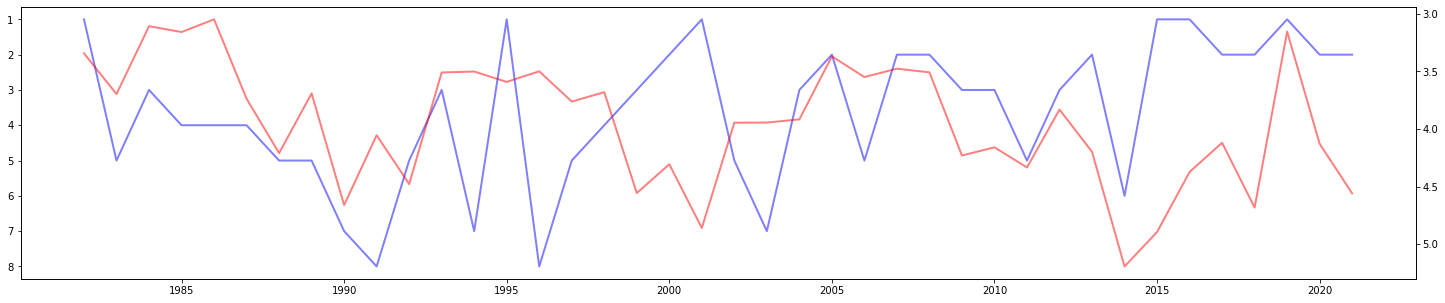

In [588]:
plt.figure(figsize=(25,5))            
plt.plot(df['연도'], df['두산'], color='blue', alpha=0.5, linewidth=2)
plt.gca().invert_yaxis()

fig = plt.twinx()
fig.plot(avg_df['연도'], avg_df['평자평'], color='red', alpha=0.5, linewidth=2)
plt.gca().invert_yaxis()
plt.show()

### 순위/평균실책수

In [591]:
df_list = []
for i in range(2001, 2022):
    if '두산.xlsx' in os.listdir(f'by_year/{i}'):
        df_list.append(pd.read_excel(f'by_year/{i}/두산.xlsx', sheet_name='defence_record'))

In [592]:
avg_mean = []
for i in range(len(df_list)):
    main = df_list[i].nlargest(10, 'GS')
    main['E'] = pd.to_numeric(main['E'], downcast="float")
    avg_mean.append(main['E'].mean())

In [593]:
avg_df = pd.DataFrame(columns=['연도', '실평'])
years = [x for x in range(2001, 2022)]
for i in range(len(df_list)):
    avg_df.loc[i] = [years[i], avg_mean[i]]

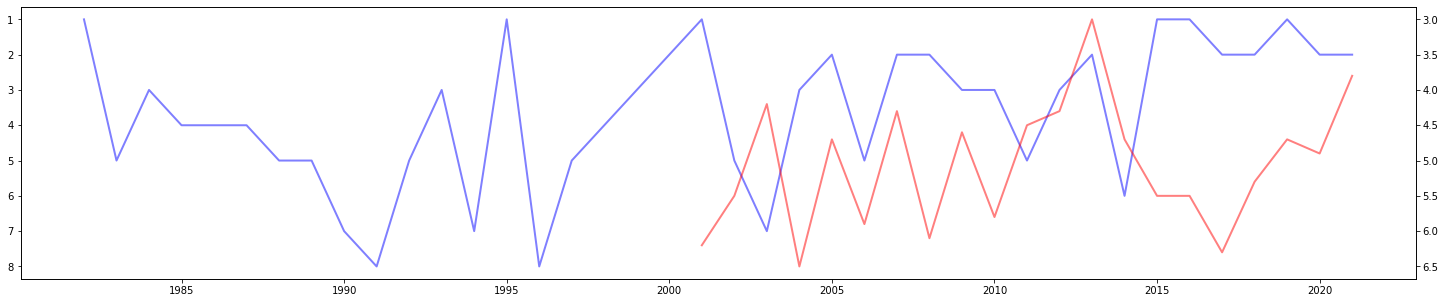

In [594]:
plt.figure(figsize=(25,5))            
plt.plot(df['연도'], df['두산'], color='blue', alpha=0.5, linewidth=2)
plt.gca().invert_yaxis()

fig = plt.twinx()
fig.plot(avg_df['연도'], avg_df['실평'], color='red', alpha=0.5, linewidth=2)
plt.gca().invert_yaxis()
plt.show()

### 순위/평균도루성공

In [595]:
df_list = []
for i in range(2001, 2022):
    if '두산.xlsx' in os.listdir(f'by_year/{i}'):
        df_list.append(pd.read_excel(f'by_year/{i}/두산.xlsx', sheet_name='run_record'))

In [596]:
avg_mean = []
for i in range(len(df_list)):
    main = df_list[i].nlargest(10, 'G')
    main['SB'] = pd.to_numeric(main['SB'], downcast="float")
    avg_mean.append(main['SB'].mean())

In [597]:
avg_df = pd.DataFrame(columns=['연도', '도성'])
years = [x for x in range(2001, 2022)]
for i in range(len(df_list)):
    avg_df.loc[i] = [years[i], avg_mean[i]]

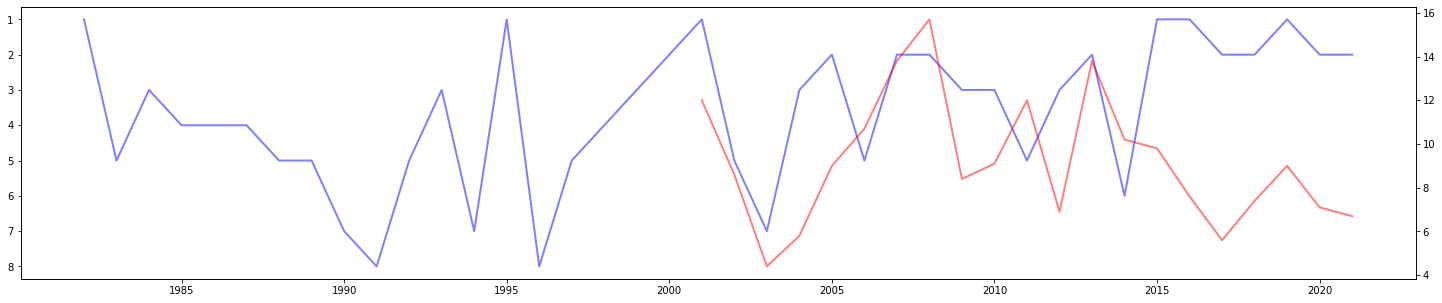

In [598]:
plt.figure(figsize=(25,5))            
plt.plot(df['연도'], df['두산'], color='blue', alpha=0.5, linewidth=2)
plt.gca().invert_yaxis()

fig = plt.twinx()
fig.plot(avg_df['연도'], avg_df['도성'], color='red', alpha=0.5, linewidth=2)
plt.show()

In [599]:
avg_df

,연도,도성
0,2001.0,12.0
1,2002.0,8.6
2,2003.0,4.4
3,2004.0,5.8
4,2005.0,9.0
5,2006.0,10.7
6,2007.0,13.8
7,2008.0,15.7
8,2009.0,8.4
9,2010.0,9.1


## 팀순위 변화

In [3]:
df = pd.read_excel("team_ranking.xlsx")

In [4]:
df

,연도,삼성,KIA,롯데,현대,LG,두산,한화,쌍방울,SSG,키움,NC,KT
0,1982,2,4,5,6.0,3,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1983,4,1,6,3.0,2,5,NaN,NaN,NaN,NaN,NaN,NaN
2,1984,2,5,1,6.0,4,3,NaN,NaN,NaN,NaN,NaN,NaN
3,1985,1,3,2,6.0,5,4,NaN,NaN,NaN,NaN,NaN,NaN
4,1986,2,1,5,6.0,3,4,7.0,NaN,NaN,NaN,NaN,NaN
5,1987,2,1,3,7.0,5,4,6.0,NaN,NaN,NaN,NaN,NaN
6,1988,4,1,3,7.0,6,5,2.0,NaN,NaN,NaN,NaN,NaN
7,1989,4,1,7,3.0,6,5,2.0,NaN,NaN,NaN,NaN,NaN
8,1990,2,3,6,5.0,1,7,4.0,NaN,NaN,NaN,NaN,NaN
9,1991,3,1,4,5.0,6,8,2.0,6.0,NaN,NaN,NaN,NaN


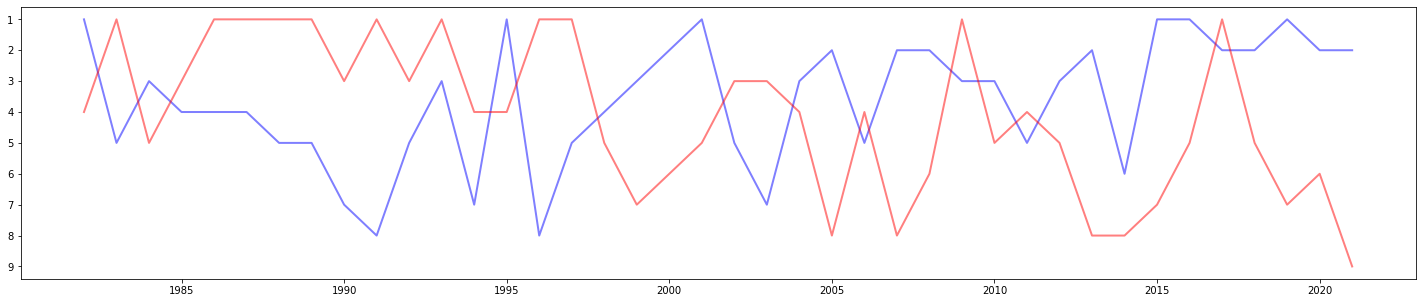

In [6]:
plt.figure(figsize=(25,5))            
plt.plot(df['연도'], df['두산'], color='blue', alpha=0.5, linewidth=2)
plt.plot(df['연도'], df['KIA'], color='red', alpha=0.5, linewidth=2)
plt.gca().invert_yaxis()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (15,) and (40,)

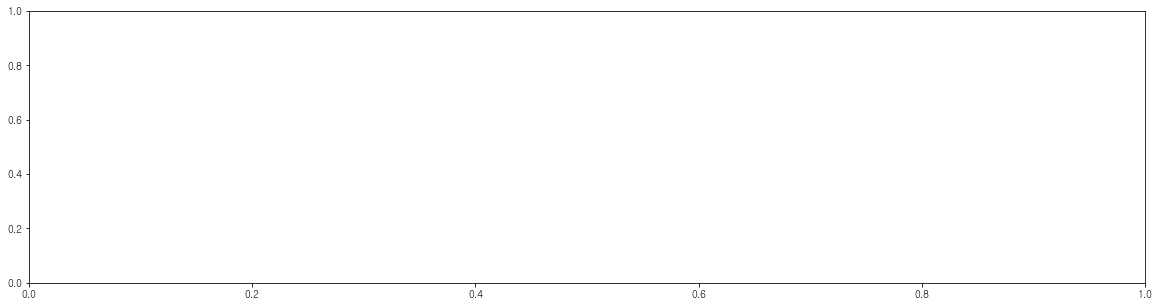

In [41]:
X = df['연도'][25:]
Y = df.columns[1:]

plt.figure(figsize=(20, 5))
for y in Y:
    plt.plot(X, df[y])
    
plt.gca().invert_yaxis()
plt.legend(Y)
plt.show()

In [14]:
df.columns[1:]

Index(['삼성', 'KIA', '롯데', '현대', 'LG', '두산', '한화', '쌍방울', 'SSG', '키움', 'NC',
       'KT'],
      dtype='object')

In [39]:
list(df.columns[1:4]) + list(df.columns[5:8]) + list(df.columns[9:])

['삼성', 'KIA', '롯데', 'LG', '두산', '한화', 'SSG', '키움', 'NC', 'KT']

In [34]:
df.columns[5:8]

Index(['LG', '두산', '한화'], dtype='object')

In [36]:
df.columns[9:]

Index(['SSG', '키움', 'NC', 'KT'], dtype='object')

In [43]:
df['연도']

0     1982
1     1983
2     1984
3     1985
4     1986
5     1987
6     1988
7     1989
8     1990
9     1991
10    1992
11    1993
12    1994
13    1995
14    1996
15    1997
16    1998
17    1999
18    2000
19    2001
20    2002
21    2003
22    2004
23    2005
24    2006
25    2007
26    2008
27    2009
28    2010
29    2011
30    2012
31    2013
32    2014
33    2015
34    2016
35    2017
36    2018
37    2019
38    2020
39    2021
Name: 연도, dtype: int64

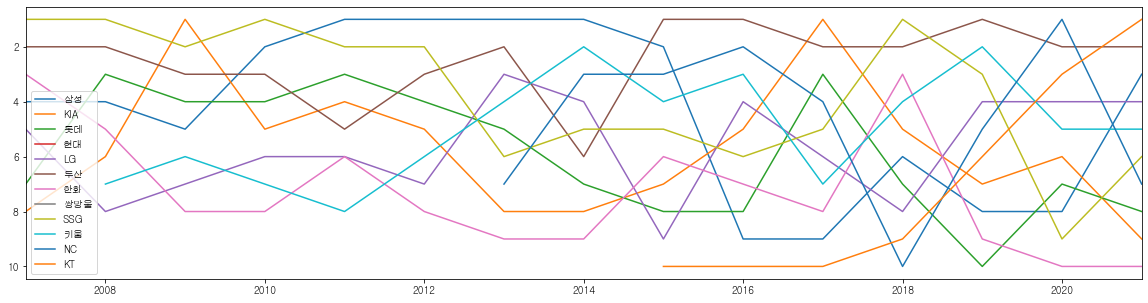

In [50]:
X = df['연도']
Y = df.columns[1:]

plt.figure(figsize=(20, 5))
for y in Y:
    plt.plot(X, df[y])

plt.xlim([2007, 2021])
plt.gca().invert_yaxis()
plt.legend(Y)
plt.show()